XGBoost notebook I used. A lot of it is based on Aurélien Géron's _Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow_. Some of the plotting stuff is taken directly from the accompying notebook available here: 

https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb

In [20]:
import numpy as np
import pandas as pd 
import xgboost as xgb 
import random
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

I want to build a noisy quadratic data set. I'll generate the quadratic points and then add noise to the X and the y and call it a day. 

In [119]:
X = np.linspace(-0.5, 0.5, 350)
y = X**2 

np.random.seed(seed=1000)
X_noise = np.random.normal(loc=0, scale=0.05, size=350)
y_noise = np.random.normal(loc=0, scale=0.025, size=350)

X = X + X_noise
y = y + y_noise

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

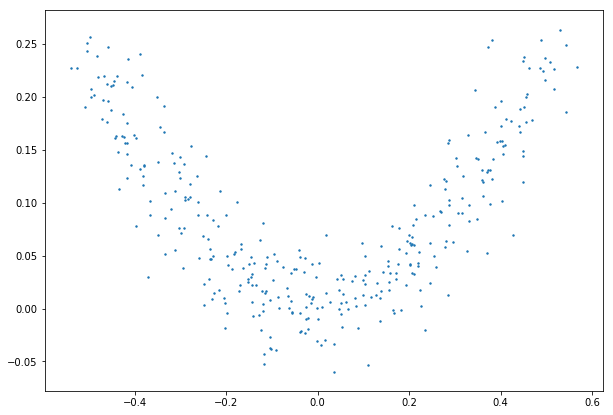

In [46]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, s=2)

### Using Basic Trees First 

In [77]:
from sklearn.tree import DecisionTreeRegressor


tree_reg_1 = DecisionTreeRegressor(max_depth=2)
tree_reg_1.fit(X, y)

y2 = y - tree_reg_1.predict(X)
tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(X, y2)

y3 = y2 - tree_reg_2.predict(X)
tree_reg_3 = DecisionTreeRegressor(max_depth=2)
tree_reg_3.fit(X, y3)

y4 = y3 - tree_reg_3.predict(X)
tree_reg_4 = DecisionTreeRegressor(max_depth=2)
tree_reg_4.fit(X, y4)

y5 = y4 - tree_reg_4.predict(X)
tree_reg_5 = DecisionTreeRegressor(max_depth=2)
tree_reg_5.fit(X, y4)

y6 = y5 - tree_reg_5.predict(X)
tree_reg_6 = DecisionTreeRegressor(max_depth=2)
tree_reg_6.fit(X, y5)

y_pred = sum(tree.predict(X_new) for tree in (tree_reg_1, tree_reg_2, tree_reg_3, tree_reg_4, tree_reg_5, tree_reg_6))


In [78]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 350)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

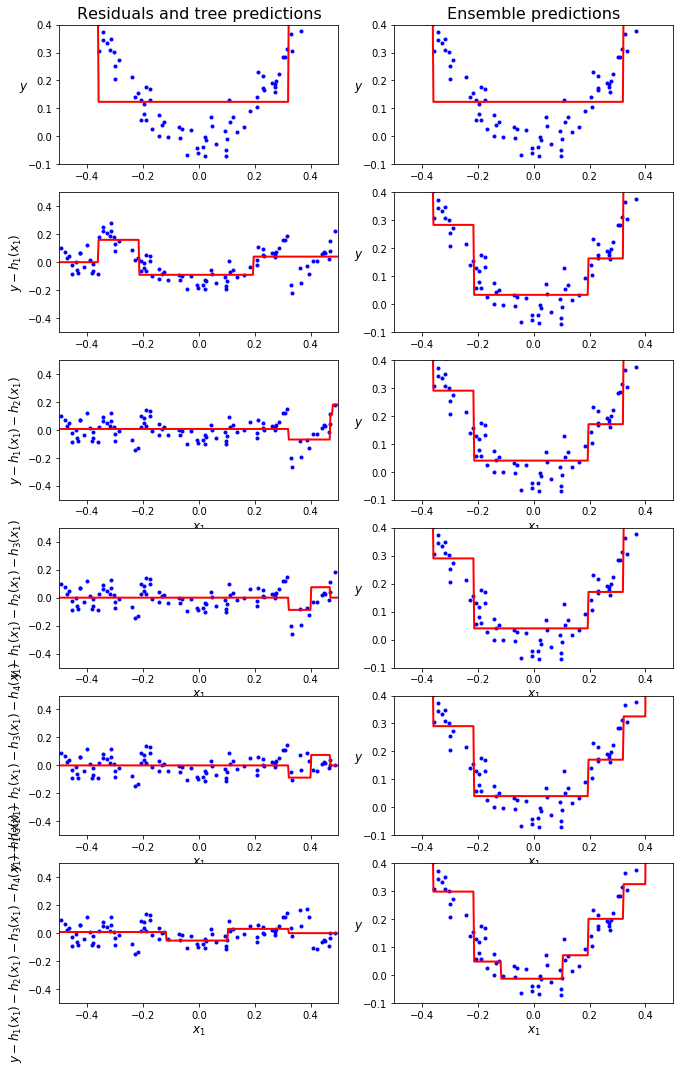

In [79]:
plt.figure(figsize=(11,18))

plt.subplot(621)
plot_predictions([tree_reg_1], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=12, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(622)
plot_predictions([tree_reg_1], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=12, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(623)
plot_predictions([tree_reg_2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5])#, label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=12)

plt.subplot(624)
plot_predictions([tree_reg_1, tree_reg_2], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=12, rotation=0)

plt.subplot(625)
plot_predictions([tree_reg_3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5])#, label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=12)
plt.xlabel("$x_1$", fontsize=12)

plt.subplot(626)
plot_predictions([tree_reg_1, tree_reg_2, tree_reg_3], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12, rotation=0)

plt.subplot(627)
plot_predictions([tree_reg_4], X, y3, axes=[-0.5, 0.5, -0.5, 0.5])#, label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1) - h_3(x_1)$", fontsize=12)
plt.xlabel("$x_1$", fontsize=12)

plt.subplot(628)
plot_predictions([tree_reg_1, tree_reg_2, tree_reg_3, tree_reg_4], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12, rotation=0)

plt.subplot(629)
plot_predictions([tree_reg_5], X, y5, axes=[-0.5, 0.5, -0.5, 0.5])#, label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1) - h_3(x_1) - h_4(x_1)$", fontsize=12)
plt.xlabel("$x_1$", fontsize=12)

plt.subplot(6,2,10)
plot_predictions([tree_reg_1, tree_reg_2, tree_reg_3, tree_reg_4, tree_reg_5], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12, rotation=0)

plt.subplot(6,2,11)
plot_predictions([tree_reg_6], X, y6, axes=[-0.5, 0.5, -0.5, 0.5])#, label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1) - h_3(x_1) - h_4(x_1) - h_5(x_1)$", fontsize=12)
plt.xlabel("$x_1$", fontsize=12)

plt.subplot(6,2,12)
plot_predictions([tree_reg_1, tree_reg_2, tree_reg_3, tree_reg_4, tree_reg_5, tree_reg_6], X, y, axes=[-0.5, 0.5, -0.1, 0.4])#, label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12, rotation=0)

# save_fig("gradient_boosting_plot")
plt.show()

#### Using the Gradient Boosting Regressor from SKLearn 

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

The first boosted tree regressor, `grbt_under`, will underfit the data, and the second one `grbt_over` will overfit the data. Notice there's a lot more trees in the second one. 

FROM _Hands on Machine Learning_:

The `learning_rate` hyperparamter scales teh contribution of each tree. **If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better**

In [85]:
gbrt_under = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt_over = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)

A `%timeit` run on both of these cells indicated that `gbrt_under.fit(X, y)` will run in $517 \mu s \pm 5.94 \mu s$, and the `gbrt_over.fit(X,y)` will take $20.2 ms \pm 233 \mu$ seconds 

In [89]:
gbrt_under.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
gbrt_over.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

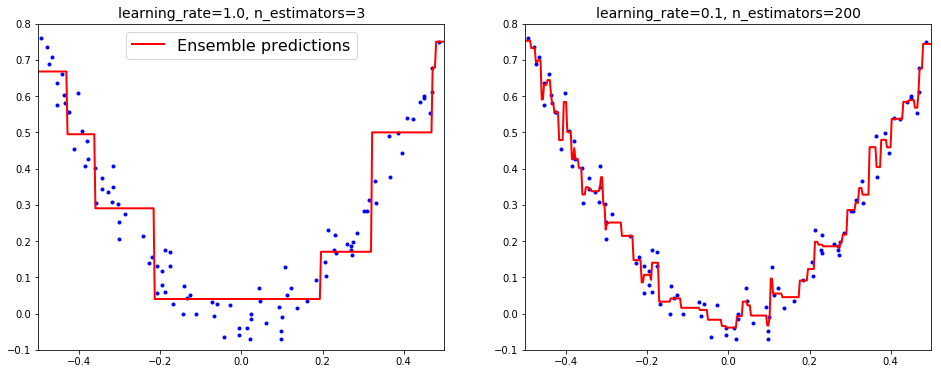

In [94]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plot_predictions([gbrt_under], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_under.learning_rate, gbrt_under.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_over], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_over.learning_rate, gbrt_over.n_estimators), fontsize=14)

plt.show()



Text(0.5, 1.0, 'learning_rate=0.1, n_estimators=20')

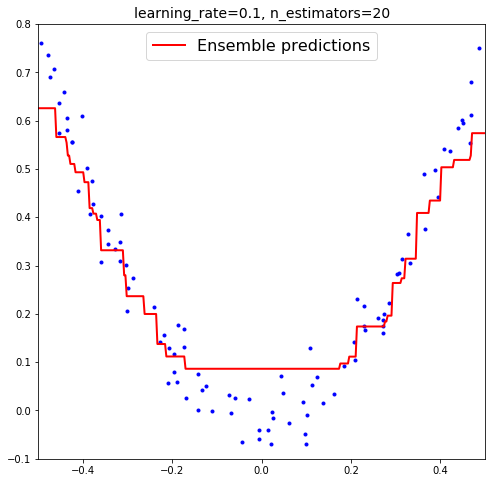

In [101]:
gbrt_right_slow = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=0.1, random_state=42)
gbrt_right_slow.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_slow.learning_rate, 
                                                     gbrt_right_slow.n_estimators), fontsize=14)

Text(0.5, 1.0, 'learning_rate=0.5, n_estimators=7')

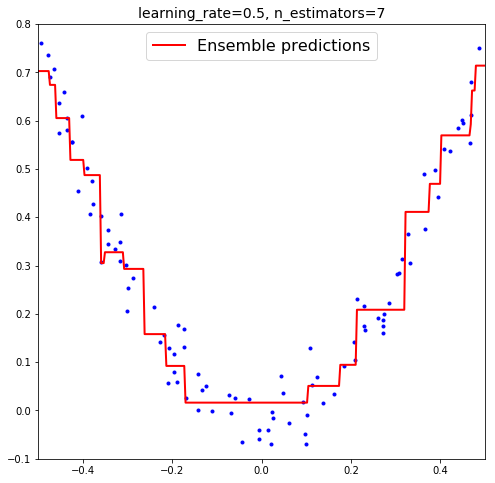

In [105]:
gbrt_right_slowish = GradientBoostingRegressor(max_depth=2, n_estimators=7, learning_rate=0.5, random_state=42)
gbrt_right_slowish.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_slowish], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_slowish.learning_rate, 
                                                     gbrt_right_slowish.n_estimators), fontsize=14)

Text(0.5, 1.0, 'learning_rate=1.0, n_estimators=7')

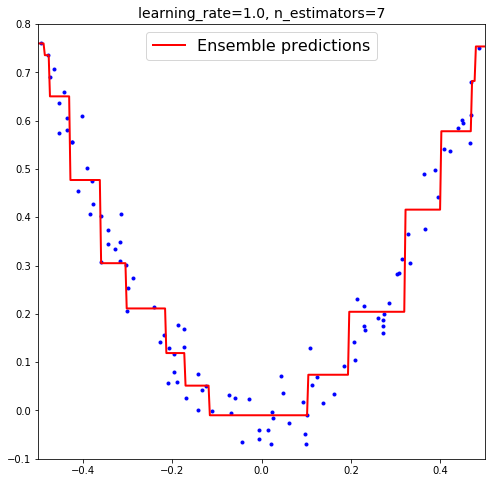

In [110]:
gbrt_right_fast = GradientBoostingRegressor(max_depth=2, n_estimators=7, learning_rate=1.0, random_state=42)
gbrt_right_fast.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_fast], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_fast.learning_rate, 
                                                     gbrt_right_fast.n_estimators), fontsize=14)

Text(0.5, 1.0, 'learning_rate=2.0, n_estimators=400')

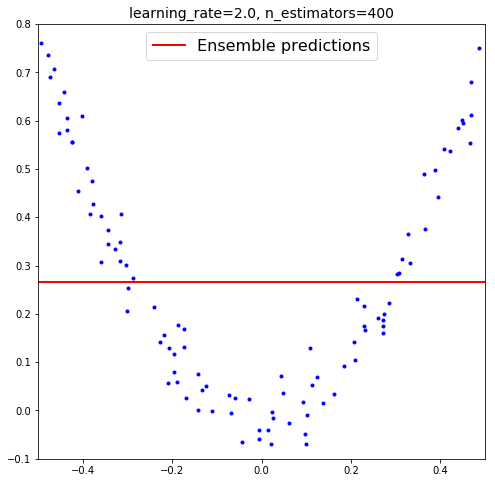

In [117]:
gbrt_right_faster = GradientBoostingRegressor(max_depth=2, n_estimators=400, learning_rate=2.0, random_state=42)
gbrt_right_faster.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_faster], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_faster.learning_rate, 
                                                     gbrt_right_faster.n_estimators), fontsize=14)

The learning above 1 really messed things up. That's interesting and I don't know why 

"A technique to slow down the learning in the gradient boosting model is to apply a weighting factor for the corrections by new trees when added to the model.

This weighting is called the shrinkage factor or the learning rate, depending on the literature or the tool.

Naive gradient boosting is the same as gradient boosting with shrinkage where the shrinkage factor is set to 1.0. Setting values less than 1.0 has the effect of making less corrections for each tree added to the model. This in turn results in more trees that must be added to the model."

--From https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

I don't why it would even allow a learning rate higher than 1 in that case 

#### Let's do a grid search to try to find the best models 

In [121]:
# I'll generate some new data from the same distribution to test on 
X_test = np.linspace(-0.5, 0.5, 50)
y_test = X_test**2 

np.random.seed(seed=100)
X_test_noise = np.random.normal(loc=0, scale=0.05, size=50)
y_test_noise = np.random.normal(loc=0, scale=0.025, size=50)

X_test = X_test + X_test_noise
y_test = y_test + y_test_noise

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [149]:
# Follwing the example above to set up the grid search
from sklearn.model_selection import GridSearchCV as GridSearch
from sklearn.model_selection import KFold

max_depth = [2, 3, 4, 5, 6, 7]
n_estimators = [10, 20, 30, 40, 50]
learning_rate = [0.01, 0.1, .25, .5]

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth) 

gbrt = GradientBoostingRegressor()

In [150]:
grid_search = GridSearch(gbrt, param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_results = grid_search.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [152]:
# ?grid_results

In [153]:
print(grid_results)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.5], 'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)


In [154]:
grid_results.cv_results_['split1_test_score']

array([-0.00445696, -0.00398614, -0.0035336 , -0.00317258, -0.00288115,
       -0.00433698, -0.00377481, -0.0033233 , -0.00295424, -0.00265944,
       -0.00430257, -0.00372112, -0.00324247, -0.0028521 , -0.00253603,
       -0.00425636, -0.00363598, -0.00313207, -0.00273094, -0.0024131 ,
       -0.0042659 , -0.00365332, -0.00314118, -0.00274292, -0.00242758,
       -0.00426612, -0.00366889, -0.00319251, -0.00281682, -0.00252054,
       -0.00194706, -0.00138741, -0.00123615, -0.00121213, -0.00123741,
       -0.00176825, -0.00126343, -0.00122735, -0.00125358, -0.00129865,
       -0.00160032, -0.0012617 , -0.00132088, -0.00137523, -0.00140197,
       -0.0015119 , -0.00127815, -0.00135686, -0.00143077, -0.00147999,
       -0.00158367, -0.00143279, -0.00151831, -0.00159799, -0.00165964,
       -0.00169309, -0.00152962, -0.00160986, -0.00169909, -0.00176327,
       -0.00131245, -0.00124515, -0.00131725, -0.00138459, -0.00140107,
       -0.00123105, -0.00136615, -0.00140875, -0.00144109, -0.00

In [156]:
grid_results.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [157]:
grid_results.best_params_

{'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 20}

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'learning_rate=0.25, n_estimators=20')

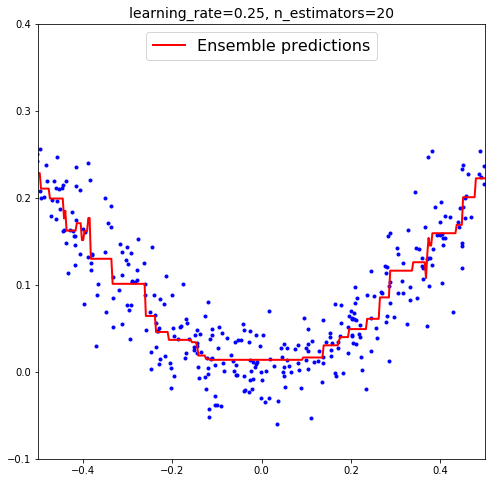

In [159]:
gbrt_right_best_grid = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=0.25, random_state=42)
gbrt_right_best_grid.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_best_grid], X, y, axes=[-0.5, 0.5, -0.1, 0.4], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_best_grid.learning_rate, 
                                                     gbrt_right_best_grid.n_estimators), fontsize=14)

In [164]:
from sklearn.model_selection import RandomizedSearchCV


max_depth = [2, 3, 4, 5, 6, 7]
n_estimators = [10, 20, 30, 40, 50]
learning_rate = [0.01, 0.1, .25, .5]

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth) 

gbrt = GradientBoostingRegressor()

random_grid_search = RandomizedSearchCV(gbrt, param_grid, n_iter=10, scoring='neg_mean_squared_error', 
                                        cv=kfold, random_state=42)
random_grid_results = random_grid_search.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [165]:
random_grid_results.best_params_

{'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.25}

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'learning_rate=0.25, n_estimators=50')

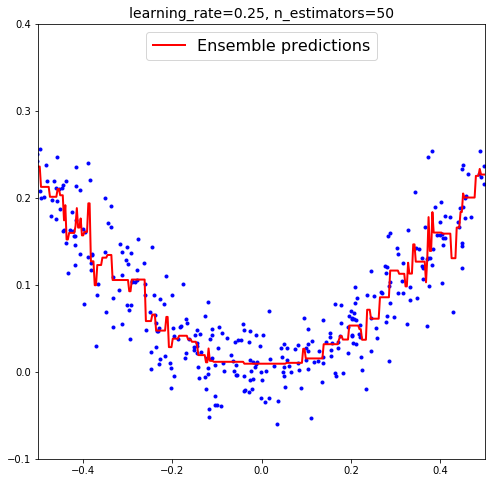

In [166]:
gbrt_right_best_grid = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.25, random_state=42)
gbrt_right_best_grid.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_best_grid], X, y, axes=[-0.5, 0.5, -0.1, 0.4], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_best_grid.learning_rate, 
                                                     gbrt_right_best_grid.n_estimators), fontsize=14)

In [168]:
from sklearn.model_selection import RandomizedSearchCV


max_depth = [2, 3, 4, 5, 6, 7]
n_estimators = [10, 20, 30, 40, 50]
learning_rate = [0.01, 0.1, .25, .5]

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth) 

gbrt = GradientBoostingRegressor()

random_grid_search = RandomizedSearchCV(gbrt, param_grid, n_iter=25, scoring='neg_mean_squared_error', 
                                        cv=kfold, random_state=42)
random_grid_results = random_grid_search.fit(X, y)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.25}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [170]:
print(random_grid_results.best_params_)

{'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.25}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'learning_rate=0.25, n_estimators=10')

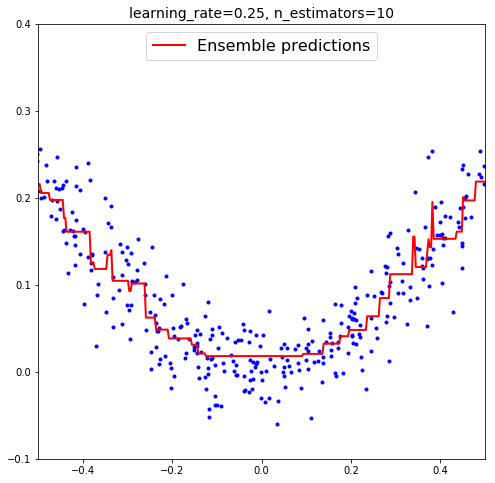

In [171]:
gbrt_right_best_grid = GradientBoostingRegressor(max_depth=3, n_estimators=10, learning_rate=0.25, random_state=42)
gbrt_right_best_grid.fit(X, y)

plt.figure(figsize=(8,8))

plt.subplot()
plot_predictions([gbrt_right_best_grid], X, y, axes=[-0.5, 0.5, -0.1, 0.4], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_right_best_grid.learning_rate, 
                                                     gbrt_right_best_grid.n_estimators), fontsize=14)